In [1]:
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

Using TensorFlow backend.


In [2]:
url = "../data_v3.csv"
df = pd.read_csv(url, header=0)

row_num = df.shape[0]
train_num = int(row_num /3*2)
test_num = -1*int(row_num /3)

col_list = ['side', 'return_t5', "return_t30", "vol_sh_out_pct","stake_pct_chg", "tran_value","mkt_cap", "prev_tran_num","hit_rate_5d", "hit_rate_30d", "hit_rate_90d"]

# Apply Min / Max Scaling
def scaler(col_name):
    df[col_name] = (df[col_name]-df[col_name].min())/ (df[col_name].max()-df[col_name].min())

scaler_list =  [ 'side', 'return_t5', "return_t30", "vol_sh_out_pct","stake_pct_chg", "tran_value", "mkt_cap", "prev_tran_num","hit_rate_5d", "hit_rate_30d", "hit_rate_90d"]

for i in scaler_list:
    scaler(i)

df['return_5d'] = df['return_5d'].replace(-1, 0)
df['return_30d'] = df['return_30d'].replace(-1, 0)
df['return_90d'] = df['return_90d'].replace(-1, 0)

X_train = df[col_list][:train_num].as_matrix()
y_train_5d = df.return_5d[:train_num].as_matrix()
y_train_30d = df.return_30d[:train_num].as_matrix()
y_train_90d = df.return_90d[:train_num].as_matrix()

X_test = df[col_list][test_num:].as_matrix()
y_test_5d = df.return_5d[test_num:].as_matrix()
y_test_30d = df.return_30d[test_num:].as_matrix()
y_test_90d = df.return_90d[test_num:].as_matrix()


C:\Anaconda3\envs\dev_env\lib\site-packages\IPython\core\interactiveshell.py:2717: DtypeWarning: Columns (26) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
# create model
model = Sequential()
model.add(Dense(4, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(1, activation='sigmoid'))
# model.add(Dense(1, input_dim=X_train.shape[1], activation='sigmoid'))

In [4]:
# Compile model
OPTIMIZER = SGD()
model.compile(loss='binary_crossentropy', optimizer=OPTIMIZER, metrics=['accuracy'])

In [5]:
# Fit the model
history = model.fit(
    X_train, y_train_5d, epochs=1000, batch_size=128,
    validation_split=0.2,
    verbose=1,
)

Train on 27584 samples, validate on 6897 samples
Epoch 1/1000
27584/27584 [==============================] - 127s 5ms/step - loss: 0.6981 - acc: 0.5454 - val_loss: 0.6966 - val_acc: 0.5337
Epoch 2/1000
27584/27584 [==============================] - 0s 11us/step - loss: 0.6935 - acc: 0.5468 - val_loss: 0.6941 - val_acc: 0.5352
Epoch 3/1000
27584/27584 [==============================] - 0s 13us/step - loss: 0.6922 - acc: 0.5471 - val_loss: 0.6929 - val_acc: 0.5355
Epoch 4/1000
27584/27584 [==============================] - 0s 14us/step - loss: 0.6914 - acc: 0.5466 - val_loss: 0.6923 - val_acc: 0.5334
Epoch 5/1000
27584/27584 [==============================] - 0s 13us/step - loss: 0.6909 - acc: 0.5456 - val_loss: 0.6920 - val_acc: 0.5328
Epoch 6/1000
27584/27584 [==============================] - 0s 13us/step - loss: 0.6904 - acc: 0.5457 - val_loss: 0.6916 - val_acc: 0.5324
Epoch 7/1000
27584/27584 [==============================] - 0s 13us/step - loss: 0.6900 - acc: 0.5477 - val_loss: 0.

27584/27584 [==============================] - 0s 17us/step - loss: 0.6803 - acc: 0.5713 - val_loss: 0.6860 - val_acc: 0.5514
Epoch 60/1000
27584/27584 [==============================] - 0s 13us/step - loss: 0.6803 - acc: 0.5701 - val_loss: 0.6859 - val_acc: 0.5524
Epoch 61/1000
27584/27584 [==============================] - 0s 13us/step - loss: 0.6802 - acc: 0.5716 - val_loss: 0.6859 - val_acc: 0.5520
Epoch 62/1000
27584/27584 [==============================] - 0s 16us/step - loss: 0.6802 - acc: 0.5712 - val_loss: 0.6859 - val_acc: 0.5521
Epoch 63/1000
27584/27584 [==============================] - 0s 15us/step - loss: 0.6801 - acc: 0.5716 - val_loss: 0.6859 - val_acc: 0.5527
Epoch 64/1000
27584/27584 [==============================] - 0s 15us/step - loss: 0.6800 - acc: 0.5715 - val_loss: 0.6859 - val_acc: 0.5514
Epoch 65/1000
27584/27584 [==============================] - 0s 12us/step - loss: 0.6800 - acc: 0.5720 - val_loss: 0.6858 - val_acc: 0.5511
Epoch 66/1000
27584/27584 [=======

27584/27584 [==============================] - 1s 21us/step - loss: 0.6781 - acc: 0.5749 - val_loss: 0.6846 - val_acc: 0.5524
Epoch 118/1000
27584/27584 [==============================] - 0s 15us/step - loss: 0.6781 - acc: 0.5751 - val_loss: 0.6846 - val_acc: 0.5528
Epoch 119/1000
27584/27584 [==============================] - 1s 22us/step - loss: 0.6781 - acc: 0.5751 - val_loss: 0.6845 - val_acc: 0.5520
Epoch 120/1000
27584/27584 [==============================] - 1s 19us/step - loss: 0.6781 - acc: 0.5748 - val_loss: 0.6845 - val_acc: 0.5524
Epoch 121/1000
27584/27584 [==============================] - 1s 22us/step - loss: 0.6781 - acc: 0.5746 - val_loss: 0.6845 - val_acc: 0.5521
Epoch 122/1000
27584/27584 [==============================] - 1s 20us/step - loss: 0.6780 - acc: 0.5749 - val_loss: 0.6845 - val_acc: 0.5523
Epoch 123/1000
27584/27584 [==============================] - 1s 20us/step - loss: 0.6780 - acc: 0.5745 - val_loss: 0.6845 - val_acc: 0.5515
Epoch 124/1000
27584/27584 [

27584/27584 [==============================] - 1s 19us/step - loss: 0.6773 - acc: 0.5768 - val_loss: 0.6840 - val_acc: 0.5482
Epoch 176/1000
27584/27584 [==============================] - 1s 20us/step - loss: 0.6773 - acc: 0.5774 - val_loss: 0.6840 - val_acc: 0.5502
Epoch 177/1000
27584/27584 [==============================] - 0s 16us/step - loss: 0.6773 - acc: 0.5785 - val_loss: 0.6840 - val_acc: 0.5499
Epoch 178/1000
27584/27584 [==============================] - 0s 12us/step - loss: 0.6773 - acc: 0.5781 - val_loss: 0.6840 - val_acc: 0.5504
Epoch 179/1000
27584/27584 [==============================] - 0s 16us/step - loss: 0.6773 - acc: 0.5779 - val_loss: 0.6839 - val_acc: 0.5505
Epoch 180/1000
27584/27584 [==============================] - 0s 15us/step - loss: 0.6772 - acc: 0.5774 - val_loss: 0.6839 - val_acc: 0.5498
Epoch 181/1000
27584/27584 [==============================] - 0s 16us/step - loss: 0.6772 - acc: 0.5777 - val_loss: 0.6839 - val_acc: 0.5497
Epoch 182/1000
27584/27584 [

27584/27584 [==============================] - 1s 19us/step - loss: 0.6769 - acc: 0.5791 - val_loss: 0.6838 - val_acc: 0.5504
Epoch 234/1000
27584/27584 [==============================] - 1s 22us/step - loss: 0.6769 - acc: 0.5799 - val_loss: 0.6838 - val_acc: 0.5504
Epoch 235/1000
27584/27584 [==============================] - 1s 18us/step - loss: 0.6769 - acc: 0.5792 - val_loss: 0.6838 - val_acc: 0.5495
Epoch 236/1000
27584/27584 [==============================] - 0s 16us/step - loss: 0.6769 - acc: 0.5797 - val_loss: 0.6838 - val_acc: 0.5508
Epoch 237/1000
27584/27584 [==============================] - 0s 15us/step - loss: 0.6769 - acc: 0.5792 - val_loss: 0.6838 - val_acc: 0.5502
Epoch 238/1000
27584/27584 [==============================] - 0s 16us/step - loss: 0.6769 - acc: 0.5799 - val_loss: 0.6838 - val_acc: 0.5505
Epoch 239/1000
27584/27584 [==============================] - 0s 12us/step - loss: 0.6769 - acc: 0.5790 - val_loss: 0.6838 - val_acc: 0.5491
Epoch 240/1000
27584/27584 [

27584/27584 [==============================] - 1s 20us/step - loss: 0.6767 - acc: 0.5793 - val_loss: 0.6837 - val_acc: 0.5498
Epoch 292/1000
27584/27584 [==============================] - 0s 15us/step - loss: 0.6767 - acc: 0.5791 - val_loss: 0.6837 - val_acc: 0.5514
Epoch 293/1000
27584/27584 [==============================] - 1s 21us/step - loss: 0.6767 - acc: 0.5799 - val_loss: 0.6838 - val_acc: 0.5513
Epoch 294/1000
27584/27584 [==============================] - 1s 23us/step - loss: 0.6767 - acc: 0.5797 - val_loss: 0.6837 - val_acc: 0.5515
Epoch 295/1000
27584/27584 [==============================] - 1s 18us/step - loss: 0.6767 - acc: 0.5790 - val_loss: 0.6838 - val_acc: 0.5510
Epoch 296/1000
27584/27584 [==============================] - 1s 22us/step - loss: 0.6767 - acc: 0.5798 - val_loss: 0.6837 - val_acc: 0.5517
Epoch 297/1000
27584/27584 [==============================] - 1s 20us/step - loss: 0.6767 - acc: 0.5795 - val_loss: 0.6837 - val_acc: 0.5514
Epoch 298/1000
27584/27584 [

27584/27584 [==============================] - 1s 19us/step - loss: 0.6766 - acc: 0.5793 - val_loss: 0.6839 - val_acc: 0.5510
Epoch 350/1000
27584/27584 [==============================] - 0s 17us/step - loss: 0.6766 - acc: 0.5800 - val_loss: 0.6839 - val_acc: 0.5507
Epoch 351/1000
27584/27584 [==============================] - 0s 15us/step - loss: 0.6766 - acc: 0.5797 - val_loss: 0.6839 - val_acc: 0.5495
Epoch 352/1000
27584/27584 [==============================] - 0s 15us/step - loss: 0.6766 - acc: 0.5792 - val_loss: 0.6839 - val_acc: 0.5504
Epoch 353/1000
27584/27584 [==============================] - 0s 15us/step - loss: 0.6766 - acc: 0.5799 - val_loss: 0.6839 - val_acc: 0.5510
Epoch 354/1000
27584/27584 [==============================] - 0s 18us/step - loss: 0.6766 - acc: 0.5798 - val_loss: 0.6839 - val_acc: 0.5497
Epoch 355/1000
27584/27584 [==============================] - 1s 18us/step - loss: 0.6766 - acc: 0.5804 - val_loss: 0.6839 - val_acc: 0.5497
Epoch 356/1000
27584/27584 [

27584/27584 [==============================] - 0s 13us/step - loss: 0.6766 - acc: 0.5794 - val_loss: 0.6839 - val_acc: 0.5495
Epoch 408/1000
27584/27584 [==============================] - 0s 13us/step - loss: 0.6766 - acc: 0.5795 - val_loss: 0.6840 - val_acc: 0.5501
Epoch 409/1000
27584/27584 [==============================] - 0s 13us/step - loss: 0.6765 - acc: 0.5804 - val_loss: 0.6840 - val_acc: 0.5495
Epoch 410/1000
27584/27584 [==============================] - 1s 20us/step - loss: 0.6766 - acc: 0.5796 - val_loss: 0.6840 - val_acc: 0.5505
Epoch 411/1000
27584/27584 [==============================] - 0s 18us/step - loss: 0.6765 - acc: 0.5800 - val_loss: 0.6839 - val_acc: 0.5499
Epoch 412/1000
27584/27584 [==============================] - 0s 15us/step - loss: 0.6765 - acc: 0.5800 - val_loss: 0.6840 - val_acc: 0.5499
Epoch 413/1000
27584/27584 [==============================] - 0s 15us/step - loss: 0.6765 - acc: 0.5799 - val_loss: 0.6840 - val_acc: 0.5497
Epoch 414/1000
27584/27584 [

27584/27584 [==============================] - 0s 11us/step - loss: 0.6765 - acc: 0.5795 - val_loss: 0.6840 - val_acc: 0.5505
Epoch 466/1000
27584/27584 [==============================] - 0s 11us/step - loss: 0.6765 - acc: 0.5795 - val_loss: 0.6840 - val_acc: 0.5495
Epoch 467/1000
27584/27584 [==============================] - 0s 11us/step - loss: 0.6765 - acc: 0.5798 - val_loss: 0.6840 - val_acc: 0.5505
Epoch 468/1000
27584/27584 [==============================] - 0s 11us/step - loss: 0.6765 - acc: 0.5795 - val_loss: 0.6840 - val_acc: 0.5498
Epoch 469/1000
27584/27584 [==============================] - 0s 10us/step - loss: 0.6765 - acc: 0.5795 - val_loss: 0.6840 - val_acc: 0.5502
Epoch 470/1000
27584/27584 [==============================] - 0s 11us/step - loss: 0.6765 - acc: 0.5795 - val_loss: 0.6840 - val_acc: 0.5508
Epoch 471/1000
27584/27584 [==============================] - 0s 12us/step - loss: 0.6765 - acc: 0.5795 - val_loss: 0.6840 - val_acc: 0.5504
Epoch 472/1000
27584/27584 [

Epoch 523/1000
27584/27584 [==============================] - 0s 10us/step - loss: 0.6765 - acc: 0.5794 - val_loss: 0.6841 - val_acc: 0.5514
Epoch 524/1000
27584/27584 [==============================] - 0s 11us/step - loss: 0.6765 - acc: 0.5793 - val_loss: 0.6842 - val_acc: 0.5523
Epoch 525/1000
27584/27584 [==============================] - 0s 12us/step - loss: 0.6765 - acc: 0.5792 - val_loss: 0.6841 - val_acc: 0.5514
Epoch 526/1000
27584/27584 [==============================] - 0s 11us/step - loss: 0.6765 - acc: 0.5799 - val_loss: 0.6841 - val_acc: 0.5489
Epoch 527/1000
27584/27584 [==============================] - 0s 10us/step - loss: 0.6765 - acc: 0.5791 - val_loss: 0.6841 - val_acc: 0.5486
Epoch 528/1000
27584/27584 [==============================] - 0s 11us/step - loss: 0.6764 - acc: 0.5800 - val_loss: 0.6841 - val_acc: 0.5495
Epoch 529/1000
27584/27584 [==============================] - 0s 10us/step - loss: 0.6764 - acc: 0.5792 - val_loss: 0.6841 - val_acc: 0.5502
Epoch 530/100

27584/27584 [==============================] - 0s 12us/step - loss: 0.6764 - acc: 0.5796 - val_loss: 0.6842 - val_acc: 0.5502
Epoch 582/1000
27584/27584 [==============================] - 0s 12us/step - loss: 0.6764 - acc: 0.5790 - val_loss: 0.6842 - val_acc: 0.5494
Epoch 583/1000
27584/27584 [==============================] - 0s 13us/step - loss: 0.6764 - acc: 0.5790 - val_loss: 0.6842 - val_acc: 0.5488
Epoch 584/1000
27584/27584 [==============================] - 0s 12us/step - loss: 0.6764 - acc: 0.5789 - val_loss: 0.6842 - val_acc: 0.5517
Epoch 585/1000
27584/27584 [==============================] - 0s 15us/step - loss: 0.6764 - acc: 0.5795 - val_loss: 0.6842 - val_acc: 0.5517
Epoch 586/1000
27584/27584 [==============================] - 0s 12us/step - loss: 0.6764 - acc: 0.5792 - val_loss: 0.6842 - val_acc: 0.5494
Epoch 587/1000
27584/27584 [==============================] - 0s 11us/step - loss: 0.6764 - acc: 0.5799 - val_loss: 0.6842 - val_acc: 0.5520
Epoch 588/1000
27584/27584 [

27584/27584 [==============================] - 0s 11us/step - loss: 0.6764 - acc: 0.5785 - val_loss: 0.6842 - val_acc: 0.5484
Epoch 640/1000
27584/27584 [==============================] - 0s 11us/step - loss: 0.6764 - acc: 0.5789 - val_loss: 0.6842 - val_acc: 0.5499
Epoch 641/1000
27584/27584 [==============================] - 0s 11us/step - loss: 0.6763 - acc: 0.5800 - val_loss: 0.6844 - val_acc: 0.5533
Epoch 642/1000
27584/27584 [==============================] - 0s 13us/step - loss: 0.6764 - acc: 0.5793 - val_loss: 0.6843 - val_acc: 0.5507
Epoch 643/1000
27584/27584 [==============================] - 0s 11us/step - loss: 0.6764 - acc: 0.5792 - val_loss: 0.6843 - val_acc: 0.5513
Epoch 644/1000
27584/27584 [==============================] - 0s 11us/step - loss: 0.6764 - acc: 0.5792 - val_loss: 0.6843 - val_acc: 0.5517
Epoch 645/1000
27584/27584 [==============================] - 0s 11us/step - loss: 0.6764 - acc: 0.5785 - val_loss: 0.6843 - val_acc: 0.5508
Epoch 646/1000
27584/27584 [

27584/27584 [==============================] - 0s 12us/step - loss: 0.6763 - acc: 0.5787 - val_loss: 0.6843 - val_acc: 0.5498
Epoch 698/1000
27584/27584 [==============================] - 0s 13us/step - loss: 0.6763 - acc: 0.5790 - val_loss: 0.6843 - val_acc: 0.5502
Epoch 699/1000
27584/27584 [==============================] - 0s 13us/step - loss: 0.6763 - acc: 0.5789 - val_loss: 0.6843 - val_acc: 0.5502
Epoch 700/1000
27584/27584 [==============================] - 0s 11us/step - loss: 0.6763 - acc: 0.5804 - val_loss: 0.6843 - val_acc: 0.5514
Epoch 701/1000
27584/27584 [==============================] - 0s 12us/step - loss: 0.6763 - acc: 0.5795 - val_loss: 0.6843 - val_acc: 0.5504
Epoch 702/1000
27584/27584 [==============================] - 0s 11us/step - loss: 0.6763 - acc: 0.5784 - val_loss: 0.6843 - val_acc: 0.5494
Epoch 703/1000
27584/27584 [==============================] - 0s 13us/step - loss: 0.6763 - acc: 0.5790 - val_loss: 0.6843 - val_acc: 0.5510
Epoch 704/1000
27584/27584 [

27584/27584 [==============================] - 0s 16us/step - loss: 0.6763 - acc: 0.5796 - val_loss: 0.6844 - val_acc: 0.5521
Epoch 756/1000
27584/27584 [==============================] - 0s 12us/step - loss: 0.6763 - acc: 0.5787 - val_loss: 0.6844 - val_acc: 0.5515
Epoch 757/1000
27584/27584 [==============================] - 0s 16us/step - loss: 0.6763 - acc: 0.5791 - val_loss: 0.6843 - val_acc: 0.5494
Epoch 758/1000
27584/27584 [==============================] - 0s 16us/step - loss: 0.6763 - acc: 0.5783 - val_loss: 0.6844 - val_acc: 0.5502
Epoch 759/1000
27584/27584 [==============================] - 0s 14us/step - loss: 0.6763 - acc: 0.5785 - val_loss: 0.6844 - val_acc: 0.5515
Epoch 760/1000
27584/27584 [==============================] - 0s 12us/step - loss: 0.6763 - acc: 0.5790 - val_loss: 0.6844 - val_acc: 0.5510
Epoch 761/1000
27584/27584 [==============================] - 0s 11us/step - loss: 0.6763 - acc: 0.5788 - val_loss: 0.6844 - val_acc: 0.5518
Epoch 762/1000
27584/27584 [

27584/27584 [==============================] - 0s 16us/step - loss: 0.6763 - acc: 0.5787 - val_loss: 0.6844 - val_acc: 0.5499
Epoch 814/1000
27584/27584 [==============================] - 1s 19us/step - loss: 0.6763 - acc: 0.5788 - val_loss: 0.6844 - val_acc: 0.5498
Epoch 815/1000
27584/27584 [==============================] - 1s 20us/step - loss: 0.6763 - acc: 0.5793 - val_loss: 0.6844 - val_acc: 0.5499
Epoch 816/1000
27584/27584 [==============================] - 1s 18us/step - loss: 0.6763 - acc: 0.5783 - val_loss: 0.6844 - val_acc: 0.5498
Epoch 817/1000
27584/27584 [==============================] - 0s 17us/step - loss: 0.6763 - acc: 0.5788 - val_loss: 0.6844 - val_acc: 0.5520
Epoch 818/1000
27584/27584 [==============================] - 1s 18us/step - loss: 0.6763 - acc: 0.5786 - val_loss: 0.6844 - val_acc: 0.5508
Epoch 819/1000
27584/27584 [==============================] - 0s 17us/step - loss: 0.6763 - acc: 0.5790 - val_loss: 0.6844 - val_acc: 0.5501
Epoch 820/1000
27584/27584 [

Epoch 871/1000
27584/27584 [==============================] - 0s 14us/step - loss: 0.6762 - acc: 0.5783 - val_loss: 0.6844 - val_acc: 0.5513
Epoch 872/1000
27584/27584 [==============================] - 0s 13us/step - loss: 0.6762 - acc: 0.5786 - val_loss: 0.6844 - val_acc: 0.5502
Epoch 873/1000
27584/27584 [==============================] - 0s 15us/step - loss: 0.6762 - acc: 0.5793 - val_loss: 0.6844 - val_acc: 0.5514
Epoch 874/1000
27584/27584 [==============================] - 0s 18us/step - loss: 0.6762 - acc: 0.5787 - val_loss: 0.6844 - val_acc: 0.5514
Epoch 875/1000
27584/27584 [==============================] - 0s 15us/step - loss: 0.6762 - acc: 0.5788 - val_loss: 0.6844 - val_acc: 0.5497
Epoch 876/1000
27584/27584 [==============================] - 1s 18us/step - loss: 0.6762 - acc: 0.5796 - val_loss: 0.6845 - val_acc: 0.5518
Epoch 877/1000
27584/27584 [==============================] - 0s 16us/step - loss: 0.6762 - acc: 0.5799 - val_loss: 0.6846 - val_acc: 0.5546
Epoch 878/100

27584/27584 [==============================] - 0s 16us/step - loss: 0.6762 - acc: 0.5786 - val_loss: 0.6845 - val_acc: 0.5514
Epoch 930/1000
27584/27584 [==============================] - 0s 17us/step - loss: 0.6762 - acc: 0.5796 - val_loss: 0.6844 - val_acc: 0.5504
Epoch 931/1000
27584/27584 [==============================] - 1s 19us/step - loss: 0.6762 - acc: 0.5797 - val_loss: 0.6845 - val_acc: 0.5515
Epoch 932/1000
27584/27584 [==============================] - 0s 15us/step - loss: 0.6762 - acc: 0.5781 - val_loss: 0.6845 - val_acc: 0.5520
Epoch 933/1000
27584/27584 [==============================] - 0s 14us/step - loss: 0.6762 - acc: 0.5799 - val_loss: 0.6845 - val_acc: 0.5521
Epoch 934/1000
27584/27584 [==============================] - 0s 15us/step - loss: 0.6762 - acc: 0.5789 - val_loss: 0.6845 - val_acc: 0.5505
Epoch 935/1000
27584/27584 [==============================] - 0s 17us/step - loss: 0.6762 - acc: 0.5798 - val_loss: 0.6844 - val_acc: 0.5514
Epoch 936/1000
27584/27584 [

27584/27584 [==============================] - 0s 17us/step - loss: 0.6762 - acc: 0.5788 - val_loss: 0.6845 - val_acc: 0.5507
Epoch 988/1000
27584/27584 [==============================] - 0s 16us/step - loss: 0.6762 - acc: 0.5797 - val_loss: 0.6845 - val_acc: 0.5517
Epoch 989/1000
27584/27584 [==============================] - 0s 17us/step - loss: 0.6762 - acc: 0.5789 - val_loss: 0.6845 - val_acc: 0.5514
Epoch 990/1000
27584/27584 [==============================] - 0s 17us/step - loss: 0.6762 - acc: 0.5791 - val_loss: 0.6845 - val_acc: 0.5508
Epoch 991/1000
27584/27584 [==============================] - 0s 17us/step - loss: 0.6762 - acc: 0.5792 - val_loss: 0.6846 - val_acc: 0.5528
Epoch 992/1000
27584/27584 [==============================] - 0s 16us/step - loss: 0.6762 - acc: 0.5797 - val_loss: 0.6845 - val_acc: 0.5515
Epoch 993/1000
27584/27584 [==============================] - 0s 16us/step - loss: 0.6762 - acc: 0.5788 - val_loss: 0.6845 - val_acc: 0.5524
Epoch 994/1000
27584/27584 [

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000261C22B92E8>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x00000261C35A9B00>]], dtype=object)

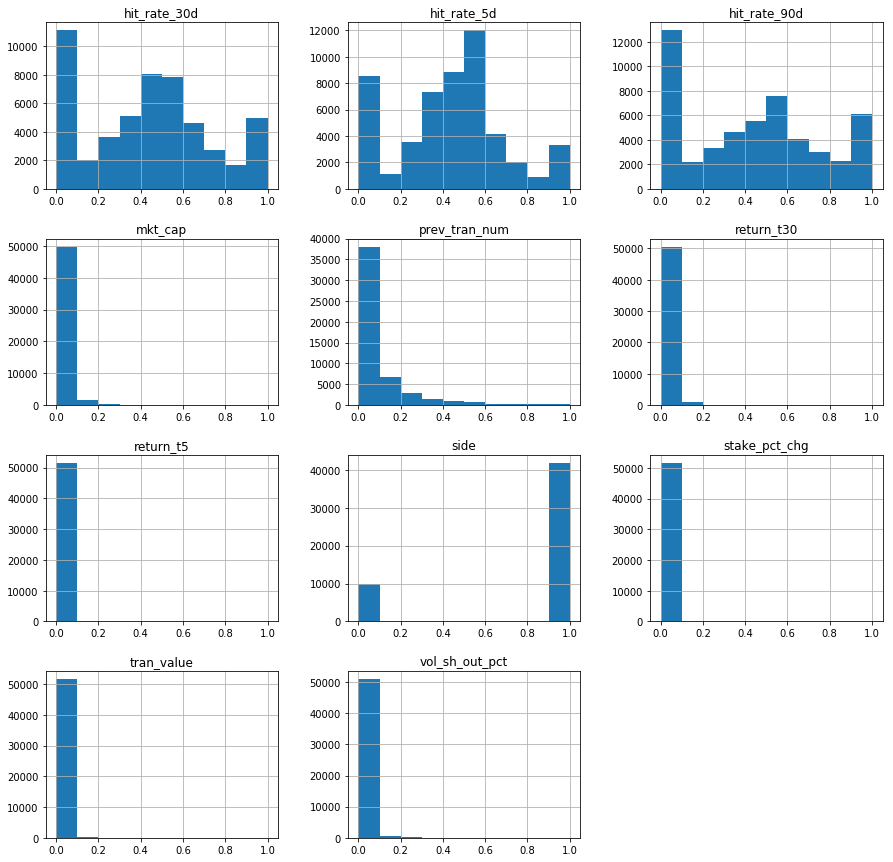

In [6]:
df[col_list].hist(figsize = [15,15])

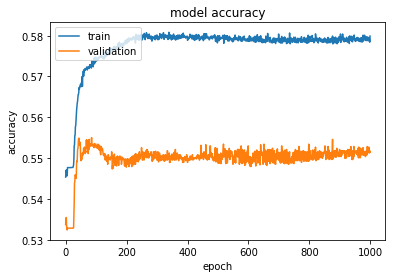

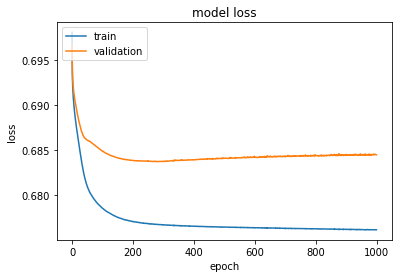

In [7]:
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [8]:
# evaluate the model
scores = model.evaluate(X_train, y_train_5d)
print("[Train] %s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

scores = model.evaluate(X_test, y_test_5d)
print("[Test] %s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

34481/34481 [==============================] - 1s 34us/step
[Train] acc: 57.34%
17240/17240 [==============================] - 1s 29us/step
[Test] acc: 57.09%
